## Traffic Flow: Part A

In [335]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### Parameters

In [336]:
nx=51
dx = 2./(nx-1)
V_max = 80
L=11
rho_max = 250
dt = 0.001

### Initial Conditions for t = 0

In [337]:
def initial_conditions(nx):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """    
    
    rho = numpy.ones(nx)*10  # 10 is the boundary condition
    rho[10:20] = 50
    
    return rho

In [338]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10  # 10 is the boundary condition
rho0[10:20] = 50
rho0 = initial_conditions(nx)

#### Density

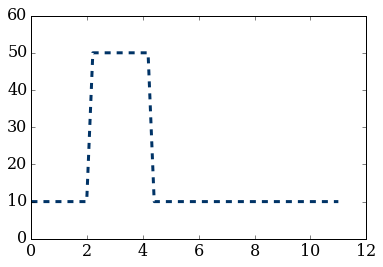

In [339]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

#### Velocity

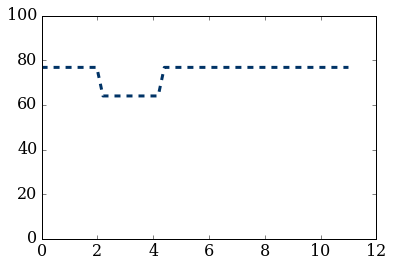

In [340]:
vel_t0 = V_max*(1-(rho0/float(rho_max)))
pyplot.plot(x, vel_t0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,100);

### Helper Functions

#### Velocity conversion function

In [341]:
def conversion(v):
    return (v*1000) / (60 * 60)

#### Velocity function

In [342]:
def Velocity(V_m, rho, rho_m):
    return V_m * (1 - rho / rho_m)

#### Flux function

In [343]:
def computeF(u_max, rho_max, rho):
    """Computes flux F=V*rho

    Parameters
    ----------
    u_max  : float
        Maximum allowed velocity
    rho    : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
        
    Returns
    -------
    F : array
        Array with flux at every point x
    """
    return u_max*rho*(1-rho/rho_max)

#### compute solution

In [344]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))   
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()  #rho_n = rho.copy()  

    for t in range(1, nt):  
        F = computeF(u_max, rho_max, rho)
        # when I include F in computation it explodes
        rho_n[t,1:] = rho[1:] + dt/(dx*rho_max) * (rho_n[t-1,0:-1]-rho_n[t-1,1:])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n  
    

### Question: Minimum velocity at t = 0

In [345]:
vel_t0 = Velocity(V_max, rho0, rho_max)
min_vel = conversion(min(vel_t0))
print("The minimum velocity at t=0 is {}.".format(min_vel))

The minimum velocity at t=0 is 17.77777777777778.


### Loop Computtaion

In [346]:
nt = 100 #250  # run for 6 mins

rho = ftbs(rho0, nt, dt, dx, rho_max, V_max)

### Question: Average velocity at t = 3

In [347]:
vel_t3 = Velocity(V_max, rho[49,:] , rho_max)      #V_max*(1-rho3/float(rho_max))
vel_t3_conv = conversion(vel_t3)
vel_t3_conv_mean = numpy.mean(vel_t3_conv)
min_vel_t3 = conversion(min(vel_t0))
print("The average velocity at t=3 is {}.".format(vel_t3_conv_mean))
print("The minimum velocity at t=3 is {}.".format(min_vel_t3))


The average velocity at t=3 is 20.636165577342044.
The minimum velocity at t=3 is 17.77777777777778.


#### Velocity

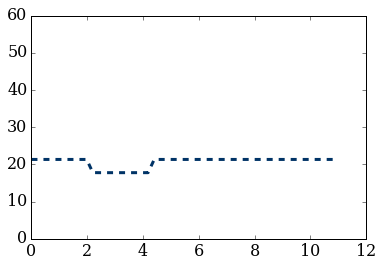

In [348]:
pyplot.plot(x, vel_t3_conv, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

### Initial Conditions for t = 6

In [349]:
vel_t6 = V_max*(1-rho[99,:]/float(rho_max))
vel_t6_conv = conversion(vel_t6)
vel_t6_conv_min = min(vel_t6_conv)
print("The minimum velocity at t=6 is {}.".format(vel_t6_conv_min))

The minimum velocity at t=6 is 17.77777777777778.


#### Velocity

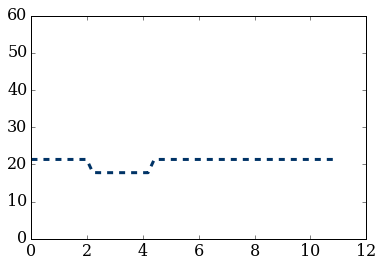

In [350]:
pyplot.plot(x, vel_t6_conv, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

#### Density at t = 3 mins

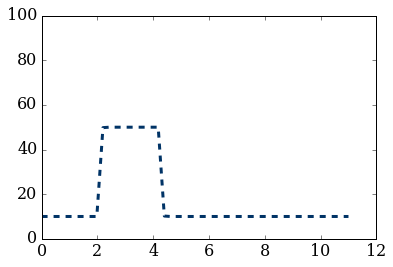

In [351]:
rho3 = rho[49,:]
pyplot.plot(x, rho3, color='#003366', ls='--', lw=3)
pyplot.ylim(0,100);

#### Density at t = 6 mins

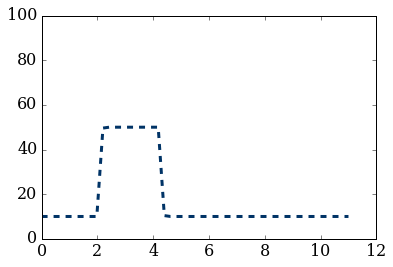

In [352]:
rho6 = rho[99,:]
pyplot.plot(x, rho6, color='#003366', ls='--', lw=3)
pyplot.ylim(0,100);